In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
#import seaborn as sns; sns.set()
from openpyxl import load_workbook

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import math

#this will mute errors that make your final pdf less legible
import warnings
warnings.filterwarnings('ignore')

filename="/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/Assistance_program_analysis/SNAP_Demographics.csv"
zip_data_filename="/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/Boston_Zip_codes_community_map.xlsx"

In [23]:
df = pd.read_csv("/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/Assistance_program_analysis/SNAP_Demographics.csv" )
df = df[df.columns.drop(list(df.filter(regex='Margin of Error')))]
df=df.fillna(method='ffill')
df.head()

,Label (Grouping),"Boston city, Massachusetts!!Total!!Estimate","Boston city, Massachusetts!!Percent!!Estimate","Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate","Boston city, Massachusetts!!Percent households receiving food stamps/SNAP!!Estimate","Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate","Boston city, Massachusetts!!Percent households not receiving food stamps/SNAP!!Estimate"
0,Households,"271,941",(X),"54,633",20.1%,"217,308",79.9%
1,With one or more people in the household 6...,"85,631",31.5%,"23,253",42.6%,"62,378",28.7%
2,No people in the household 60 years and over,"186,310",68.5%,"31,380",57.4%,"154,930",71.3%
3,HOUSEHOLD TYPE,"186,310",68.5%,"31,380",57.4%,"154,930",71.3%
4,Married-couple family,"74,624",27.4%,"11,521",21.1%,"63,103",29.0%


In [ ]:
df['Boston city, Massachusetts!!Total!!Estimate']= df['Boston city, Massachusetts!!Total!!Estimate'].str.replace(',','')
df['Boston city, Massachusetts!!Percent!!Estimate']= df['Boston city, Massachusetts!!Percent!!Estimate'].str.replace('%','')
df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate']= df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'].str.replace(',','')
df['Boston city, Massachusetts!!Percent households receiving food stamps/SNAP!!Estimate']= df['Boston city, Massachusetts!!Percent households receiving food stamps/SNAP!!Estimate'].str.replace('%','')
df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate']= df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate'].str.replace(',','')
df['Boston city, Massachusetts!!Percent households not receiving food stamps/SNAP!!Estimate']= df['Boston city, Massachusetts!!Percent households not receiving food stamps/SNAP!!Estimate'].str.replace('%','')


In [ ]:
df['Boston city, Massachusetts!!Total!!Estimate']= pd.to_numeric(df['Boston city, Massachusetts!!Total!!Estimate'], errors='coerce')
df['Boston city, Massachusetts!!Percent!!Estimate']= pd.to_numeric(df['Boston city, Massachusetts!!Percent!!Estimate'], errors='coerce')
df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate']= pd.to_numeric(df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'], errors='coerce')
df['Boston city, Massachusetts!!Percent households receiving food stamps/SNAP!!Estimate']= pd.to_numeric(df['Boston city, Massachusetts!!Percent households receiving food stamps/SNAP!!Estimate'], errors='coerce')
df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate']= pd.to_numeric(df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate'], errors='coerce')
df['Boston city, Massachusetts!!Percent!!Estimate']= pd.to_numeric(df['Boston city, Massachusetts!!Percent!!Estimate'], errors='coerce')
df['Boston city, Massachusetts!!Total!!Estimate']= pd.to_numeric(df['Boston city, Massachusetts!!Total!!Estimate'], errors='coerce')
df['Boston city, Massachusetts!!Percent households not receiving food stamps/SNAP!!Estimate']= pd.to_numeric(df['Boston city, Massachusetts!!Percent households not receiving food stamps/SNAP!!Estimate'], errors='coerce')
df

In [44]:
a=[df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'][1],df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate'][1]]
a

[23253.0, 62378.0]

                                  cases
HouseHolds Receiving SNAP       54633.0
HouseHolds not Receiving SNAP  217308.0


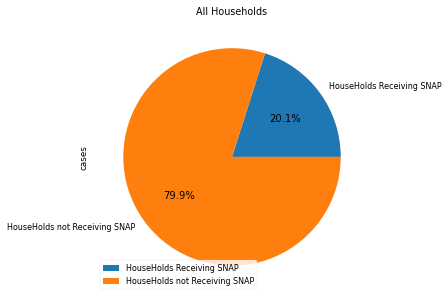

In [53]:
df3 = pd.DataFrame({'cases':[df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'][0],df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate'][0]]}, index=['HouseHolds Receiving SNAP','HouseHolds not Receiving SNAP'])
print(df3)
plot = df3.plot.pie(y='cases', title='All Households',figsize=(5, 5),autopct='%1.1f%%')

                                 cases
HouseHolds Receiving SNAP      23253.0
HouseHolds not Receiving SNAP  62378.0


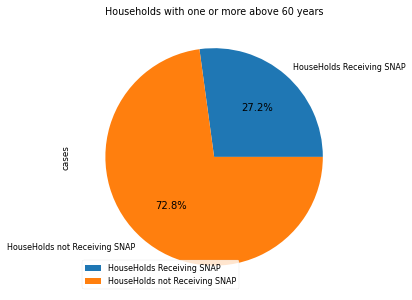

In [54]:
df3 = pd.DataFrame({'cases':[df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'][1],df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate'][1]]}, index=['HouseHolds Receiving SNAP','HouseHolds not Receiving SNAP'])
print(df3)
plot = df3.plot.pie(y='cases', title='Households with one or more above 60 years',figsize=(5, 5),autopct='%1.1f%%')

                                  cases
HouseHolds Receiving SNAP       31380.0
HouseHolds not Receiving SNAP  154930.0


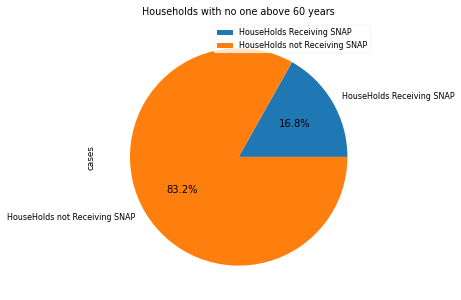

In [79]:
df3 = pd.DataFrame({'cases':[df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'][2],df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate'][2]]}, index=['HouseHolds Receiving SNAP','HouseHolds not Receiving SNAP'])
print(df3)
plot = df3.plot.pie(y='cases', title='Households with no one above 60 years',figsize=(5, 5),autopct='%1.1f%%')

In [80]:
df

,Label (Grouping),"Boston city, Massachusetts!!Total!!Estimate","Boston city, Massachusetts!!Percent!!Estimate","Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate","Boston city, Massachusetts!!Percent households receiving food stamps/SNAP!!Estimate","Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate","Boston city, Massachusetts!!Percent households not receiving food stamps/SNAP!!Estimate"
0,Households,271941.0,NaN,54633.0,20.1,217308.0,79.9
1,With one or more people in the household 6...,85631.0,31.5,23253.0,42.6,62378.0,28.7
2,No people in the household 60 years and over,186310.0,68.5,31380.0,57.4,154930.0,71.3
3,HOUSEHOLD TYPE,186310.0,68.5,31380.0,57.4,154930.0,71.3
4,Married-couple family,74624.0,27.4,11521.0,21.1,63103.0,29.0
5,Other family:,46912.0,17.3,21932.0,40.1,24980.0,11.5
6,"Male householder, no spouse present",10437.0,3.8,2648.0,4.8,7789.0,3.6
7,"Female householder, no spouse present",36475.0,13.4,19284.0,35.3,17191.0,7.9
8,Nonfamily households,150405.0,55.3,21180.0,38.8,129225.0,59.5
9,With children under 18 years,54072.0,19.9,21693.0,39.7,32379.0,14.9


                                 cases
HouseHolds Receiving SNAP      11521.0
HouseHolds not Receiving SNAP  63103.0


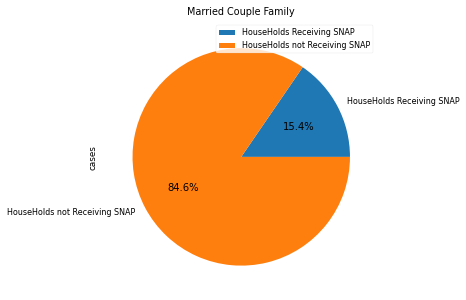

In [57]:
df3 = pd.DataFrame({'cases':[df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'][4],df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate'][4]]}, index=['HouseHolds Receiving SNAP','HouseHolds not Receiving SNAP'])
print(df3)
plot = df3.plot.pie(y='cases', title='Married Couple Family',figsize=(5, 5),autopct='%1.1f%%')

                                 cases
HouseHolds Receiving SNAP      21932.0
HouseHolds not Receiving SNAP  24980.0


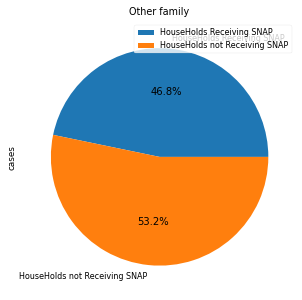

In [58]:
df3 = pd.DataFrame({'cases':[df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'][5],df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate'][5]]}, index=['HouseHolds Receiving SNAP','HouseHolds not Receiving SNAP'])
print(df3)
plot = df3.plot.pie(y='cases', title='Other family',figsize=(5, 5),autopct='%1.1f%%')

                                  cases
HouseHolds Receiving SNAP       21099.0
HouseHolds not Receiving SNAP  128717.0


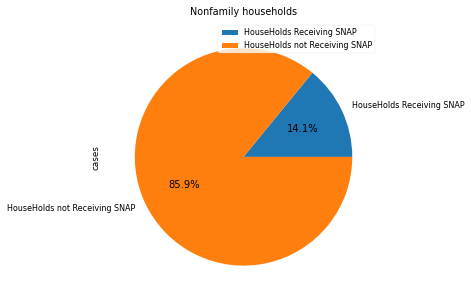

In [59]:
df3 = pd.DataFrame({'cases':[df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'][20],df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate'][20]]}, index=['HouseHolds Receiving SNAP','HouseHolds not Receiving SNAP'])
print(df3)
plot = df3.plot.pie(y='cases', title='Nonfamily households',figsize=(5, 5),autopct='%1.1f%%')

                                 cases
HouseHolds Receiving SNAP      26602.0
HouseHolds not Receiving SNAP  26340.0


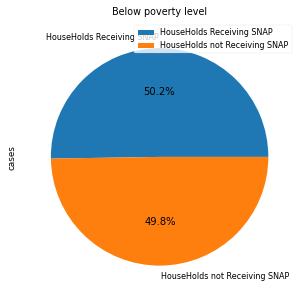

In [60]:
df3 = pd.DataFrame({'cases':[df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'][22],df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate'][22]]}, index=['HouseHolds Receiving SNAP','HouseHolds not Receiving SNAP'])
print(df3)
plot = df3.plot.pie(y='cases', title='Below poverty level',figsize=(5, 5),autopct='%1.1f%%')

                                  cases
HouseHolds Receiving SNAP       28031.0
HouseHolds not Receiving SNAP  190968.0


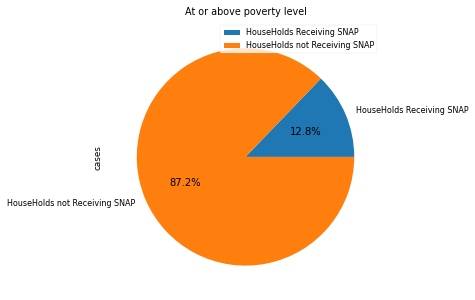

In [61]:
df3 = pd.DataFrame({'cases':[df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'][23],df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate'][23]]}, index=['HouseHolds Receiving SNAP','HouseHolds not Receiving SNAP'])
print(df3)
plot = df3.plot.pie(y='cases', title='At or above poverty level',figsize=(5, 5),autopct='%1.1f%%')

                                 cases
HouseHolds Receiving SNAP      25647.0
HouseHolds not Receiving SNAP  33822.0


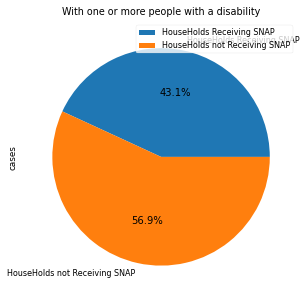

In [62]:
df3 = pd.DataFrame({'cases':[df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'][25],df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate'][25]]}, index=['HouseHolds Receiving SNAP','HouseHolds not Receiving SNAP'])
print(df3)
plot = df3.plot.pie(y='cases', title='With one or more people with a disability',figsize=(5, 5),autopct='%1.1f%%')

                                  cases
HouseHolds Receiving SNAP       28986.0
HouseHolds not Receiving SNAP  183486.0


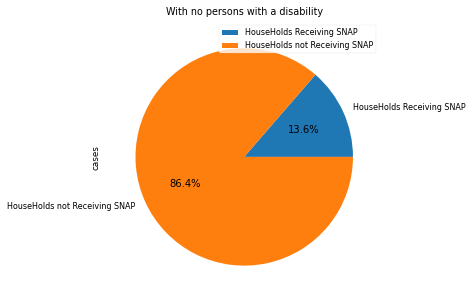

In [63]:
df3 = pd.DataFrame({'cases':[df['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'][26],df['Boston city, Massachusetts!!Households not receiving food stamps/SNAP!!Estimate'][26]]}, index=['HouseHolds Receiving SNAP','HouseHolds not Receiving SNAP'])
print(df3)
plot = df3.plot.pie(y='cases', title='With no persons with a disability',figsize=(5, 5),autopct='%1.1f%%')

In [85]:
df4=df.loc[28:36]
df4=df4.dropna()

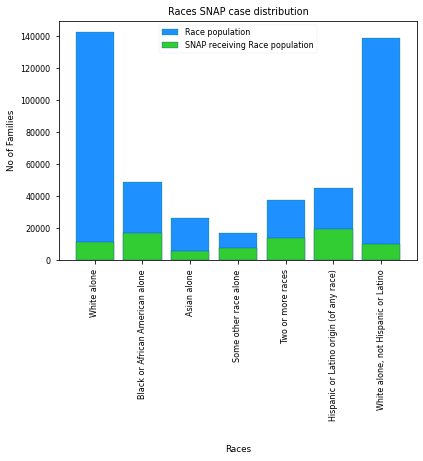

In [86]:

plt.xticks(rotation='vertical')
plt.bar(df4['Label (Grouping)'], df4['Boston city, Massachusetts!!Total!!Estimate'], color='dodgerblue',  edgecolor='green',label='Race population')
plt.bar(df4['Label (Grouping)'], df4['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'], color='limegreen',  edgecolor='blue',label='SNAP receiving Race population')

colors = {'Race population':'blue', 'SNAP receiving Race population':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,loc='center right')
plt.title('Races SNAP case distribution')
plt.xlabel('Races')
plt.ylabel('No of Families')
plt.legend()
plt.show()


In [81]:
df4=df.loc[41:43]
df4=df4.dropna()

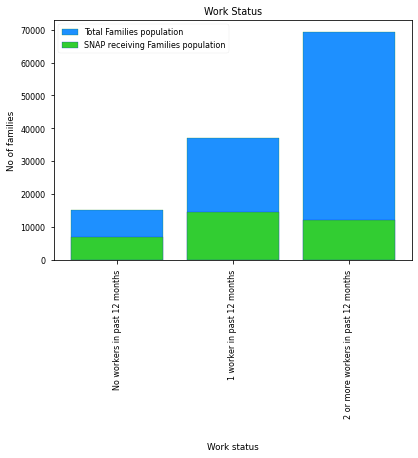

In [83]:

plt.xticks(rotation='vertical')
plt.bar(df4['Label (Grouping)'], df4['Boston city, Massachusetts!!Total!!Estimate'], color='dodgerblue',  edgecolor='green',label='Total Families population')
plt.bar(df4['Label (Grouping)'], df4['Boston city, Massachusetts!!Households receiving food stamps/SNAP!!Estimate'], color='limegreen',  edgecolor='blue',label='SNAP receiving Families population')

colors = {'Race population':'green', 'SNAP receiving Race population':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,loc='center right')
plt.title('Work Status')
plt.xlabel('Work status')
plt.ylabel('No of families')
plt.legend()
plt.show()
